In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Gradient boosting

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

data = pd.read_csv(r"apartments_final.csv")
X=data[['bedrooms', 'bathrooms','square_feet','transit_score','walk_score']]
y=data['monthly_rent']
#print(y)
#print(X.shape,y.shape)
#print(np.isnan(y))

# define the model
model = GradientBoostingRegressor()

Error Measurement

Gradient boost RMSE: 96857.92109631967
Gradient boost rent error: 311.2200525292669


Text(0, 0.5, 'Percent Error [Model-Listing]')

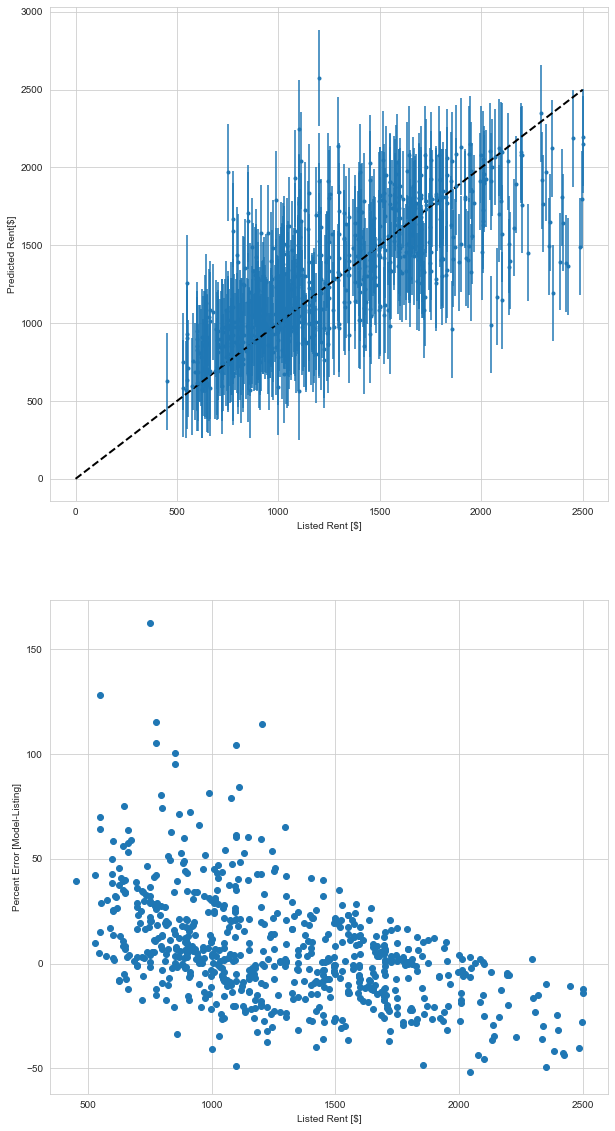

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=40)
model.fit(X_train,y_train)

predicted = model.predict(X_test)
model_var = ((y_test-predicted)**2).sum()/len(y_test)
print(f"Gradient boost RMSE: {model_var}")
print(f"Gradient boost rent error: {model_var**0.5}")

fig, axs = plt.subplots(2,1, figsize=(10,20))
axs[0].errorbar(y_test, predicted, yerr=model_var**0.5, linestyle="", marker=".")
axs[0].plot(range(2500), range(2500), linestyle="--", linewidth="2", color="k")
axs[0].set_xlabel("Listed Rent [$]")
axs[0].set_ylabel("Predicted Rent[$]")
axs[1].scatter(y_test, (predicted-y_test)*100/y_test)
axs[1].set_xlabel("Listed Rent [$]")
axs[1].set_ylabel("Percent Error [Model-Listing]")